# Fundamental Workflow
In a neural network, the basic workflow goes from adding and importing data, which is then split into training and testing sets. Then, a model is created where its parameters are randomly initialized in the __init__ method, and a forward method defines the actual computation that uses these parameters. These parameters are updated using an optimizer by learning from the training data over numerous times, which are known as epochs. A loss function is set up where the difference between the predicted value and the actual value is calculated. This loss is then used by calling loss.backward() to calculate the gradients, which tell the optimizer the direction to adjust the parameters to reduce the loss. The optimizer then performs the update with optimizer.step(). For testing, gradients are not calculated; the model is set to evaluation mode with model.eval(), and predictions are made on the testing data inside a torch.inference_mode() block. This is a typical workflow of PyTorch neural network models.  

In [15]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [16]:
# Create data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1) #features
Y = X*weight + bias #labels

X,Y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [17]:
# Splitting data
train_split = int(0.8 * len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]
len(X_train),len(X_test)

(40, 10)

In [18]:
def plot_predictions(train_data=X_train, 
                     train_labels=Y_train, 
                     test_data=X_test, 
                     test_labels=Y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

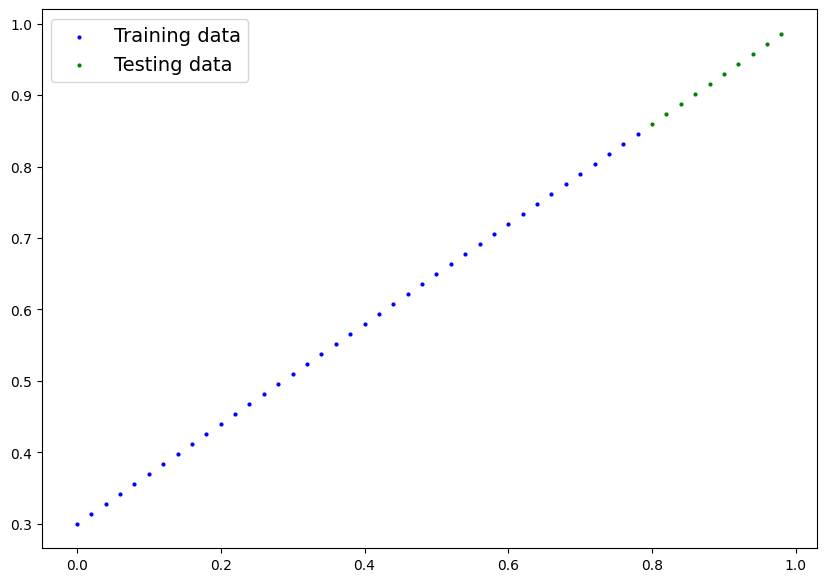

In [19]:
plot_predictions()

In [20]:
#Create a class where the main computation of model would be written which extends the parent clss nn.module and uses nn.Parameter
class Linear_Regression_Model(nn.Module):
    def __init__(self):
        super().__init__()

        #initialize the model parameters
        self.weights = nn.Parameter(torch.randn(1, #Start with random weights and it will later tune it accordingly after it learns
                                               dtype = torch.float32),
                                              requires_grad = True) # Updatable with gradient descent))
        self.bias = nn.Parameter(torch.randn(1, #Start with random weights and it will later tune it accordingly after it learns
                                               dtype = torch.float32),
                                              requires_grad = True) # Updatable with gradient descent))

    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x + self.bias #this is the linear regression formula

In [21]:
#Create a object of our Class
torch.manual_seed(42)

model = Linear_Regression_Model()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
# Make predictions
#with torch.inference_mode():
   # predictions = model(X_test)
    
#predictions

In [23]:
# plot_predictions(predictions = prediction)

In [24]:
# Create a loss Function
loss_fn = nn.L1Loss() #Mean Absolute Loss Function

#Create  Optimizer
optimizer = torch.optim.SGD(params = model.parameters(),# Tells the optimizer what is to be updates
                            lr = 0.0001) # Sets at what rate are the values to be updated)

# The Game of Loops For Training and Testing 
### Training Loop
![image.png](attachment:1dfaf56e-db35-4da2-afeb-bf7a5b3f1c46.png)

### Testing Loop
![image.png](attachment:1463ee0c-dc83-4a2a-a9f2-2bd0414736b3.png)

In [25]:

#training loop and testing loop

# set epochs
epochs = 100 #number of times the model should look at the trainign data

# Creating empty list for the metrics recieved across the loop
training_loss_values = []
testing_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # Training .....
    # Give model the training data
    model.train()

    #Predict the data on the basis of training data given earlier
    train_prediction = model(X_train)

    #Caluclate the loss
    loss_train = loss_fn(train_prediction,Y_train)

    # Set Zero Gradient for new gradient calculation
    optimizer.zero_grad()

    #Backpropogation
    loss_train.backward()

    #To update and imporve the optimizer with gradient calculation when requires_grad = True
    optimizer.step()

    # Testing .....
    model.eval()
    with torch.inference_mode():

        # Forward pass on Data
        prediction_test = model(X_test)

        #Calculate the loss
        loss_test = loss_fn(prediction_test,Y_test.type(torch.float32))

        #To print Whats happening
        if epoch%10 == 0:
            epoch_count.append(epoch)
            training_loss_values.append(loss_train.detach().numpy())
            testing_loss_values.append(loss_test.detach().numpy())
            print(f'Epoch: {epoch} |\n Mean Absolute Error Train loss: {loss_train} |\n Mean Absolute Error Test loss: {loss_test} |\n')

Epoch: 0 |
 Mean Absolute Error Train loss: 0.31288138031959534 |
 Mean Absolute Error Test loss: 0.4944015145301819 |

Epoch: 10 |
 Mean Absolute Error Train loss: 0.31172919273376465 |
 Mean Absolute Error Test loss: 0.49305421113967896 |

Epoch: 20 |
 Mean Absolute Error Train loss: 0.31057703495025635 |
 Mean Absolute Error Test loss: 0.4917070269584656 |

Epoch: 30 |
 Mean Absolute Error Train loss: 0.30942484736442566 |
 Mean Absolute Error Test loss: 0.4903597831726074 |

Epoch: 40 |
 Mean Absolute Error Train loss: 0.30827268958091736 |
 Mean Absolute Error Test loss: 0.48901262879371643 |

Epoch: 50 |
 Mean Absolute Error Train loss: 0.30712056159973145 |
 Mean Absolute Error Test loss: 0.4876653552055359 |

Epoch: 60 |
 Mean Absolute Error Train loss: 0.30596840381622314 |
 Mean Absolute Error Test loss: 0.4863181710243225 |

Epoch: 70 |
 Mean Absolute Error Train loss: 0.30481624603271484 |
 Mean Absolute Error Test loss: 0.48497089743614197 |

Epoch: 80 |
 Mean Absolute Err

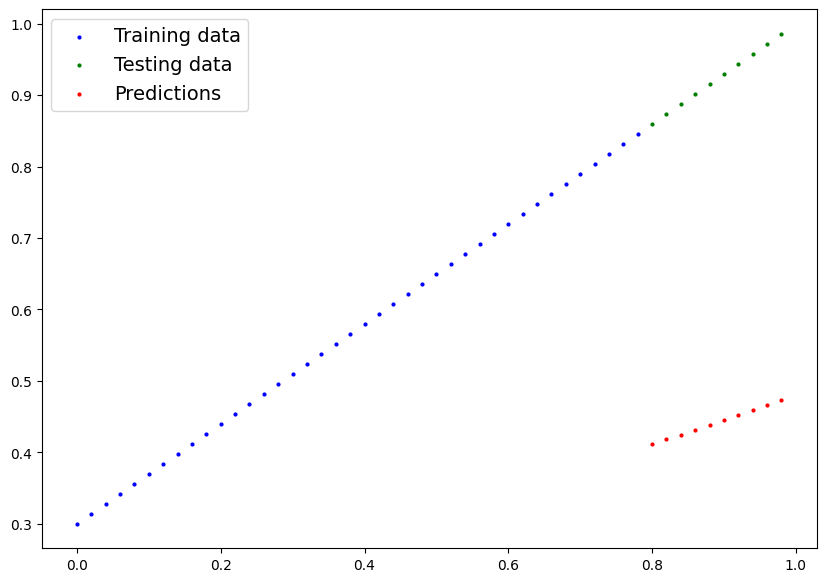

In [26]:
plot_predictions(predictions = prediction_test)

In [27]:
#Saving the model
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path(r'/kaggle/working/')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "Linear_Regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 


Saving model to: /kaggle/working/Linear_Regression_model.pth


In [28]:
#Load Model
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model = Linear_Regression_Model()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#loaded_model acts like a new instance of trained model. So hence only with torch.inference_mode u can do prediction

<All keys matched successfully>

In [32]:
# 1. SETUP - Get token and define variables
# ============================================
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()

# Get your GitHub token from Kaggle Secrets
github_token = user_secrets.get_secret("Kaggle") 

# TODO: Replace these placeholders with your details
github_username = "sharmanjeurkar-dev"
repo_name = "Pytorch-Tutorials"
user_name = "Sharman Jeurkar"
user_email = "sharmanjeurkar@gmail.com"
filename_to_add = "Linear_Regression_model.pth" # The name of the file in /kaggle/working/
commit_message = "Adding Model File"


# 2. CONFIGURE GIT & CLONE REPO
# ==============================
# Set your Git user name and email for this session
!git config --global user.name "{user_name}"
!git config --global user.email "{user_email}"

# Clone your repository using the token for authentication
!git clone https://{github_token}@github.com/{github_username}/{repo_name}.git


# 3. COPY, COMMIT, AND PUSH
# ===========================
# Navigate into your repository's directory
%cd {repo_name}

# Copy your file from the Kaggle working directory into the repo
!cp /kaggle/working/{filename_to_add} .

# Add the new file to the staging area
!git add {filename_to_add}

# Commit the changes with your message
!git commit -m "{commit_message}"

# Push the commit to your GitHub repository
!git push


Cloning into 'Pytorch-Tutorials'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 28 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 38.68 KiB | 5.53 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/kaggle/working/Pytorch-Tutorials/Pytorch-Tutorials
[main 4a3ae56] Adding Model File
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 Linear_Regression_model.pth
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 4 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 955 bytes | 955.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/sharmanjeurkar-dev/Pytorch-Tutorials.git
   9d20c72..4a3ae56  main -> main
